<h1>GRAB AI for SEA - Safety Challenge</h1>

Details of the challenge are available here: <a href="https://www.aiforsea.com/safety?fbclid=IwAR1HOWoHozCSfNoTs-6uWEPfMnwltvX1aAqxrCyqLebguSBAd3RKAmU-SAQ">link</a>

In this challenge, the dataset consists of telematics data gathered from GRAB car trips and a response variable of "dangerous" or "not dangerous" as rated by customers at the end of each trip.

The telematics data consists of the trip id, GPS accuracy, GPS bearing, accelerometer reading in x, y, and z axis, gyroscope reading in x, y, and z axis, time of the trip record in seconds, and speed measured in m/s.

Each trip can contain multiple telematic data points recording various segments of the trip, but will only be assigned a single label of dangerous or not dangerous. The total number of trips is equal to the total number of unique booking IDs within the dataset.

<h2>Data Cleaning and Preprocessing</h2>

The files provided consist of the telematics data within the "features" folder, and the response variable within the "labels" folder.

The telematics data is merged into a single dataframe for easier processing, and some basic statistics are shown below.

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

safety_path = "safety/features/*.csv"
label_path = "safety/labels/*.csv"
data = pd.DataFrame() #empty dataframe for storing feature data

#get telematics data
for fname in glob.glob(safety_path):
    print(fname)
    new_file = pd.read_csv(fname)
    #merge into single dataframe
    data = pd.concat([data,new_file])
    
#get dangerous/not-dangerous labels    
for fname in glob.glob(label_path):
    print(fname)
    labels = pd.read_csv(fname)
            

safety/features/part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
safety/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
safety/features/part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
safety/features/part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
safety/features/part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
safety/features/part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
safety/features/part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
safety/features/part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
safety/features/part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
safety/features/part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv


In [2]:
#peak at complete telematics dataframe
data.head(10)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1194000908341,4.000,203.000000,1.001973,9.745000,-0.790087,-0.066046,0.019175,0.044741,246.0,6.480000
1,1099511627891,3.000,311.000000,0.452518,9.273026,3.098191,0.005382,0.002155,-0.001436,66.0,0.340365
2,962072674446,10.000,142.807999,0.018542,-8.041156,-4.960114,0.004223,-0.014875,0.007397,1552.0,2.050000
3,1142461300867,8.000,171.205292,-0.290698,-8.295367,-3.049042,0.033618,0.046224,0.030559,277.0,17.608448
4,412316860548,19.379,0.000000,0.675613,8.846130,1.852508,-0.008652,0.003693,0.001160,148.0,0.000000
5,1176821039217,4.864,277.000000,0.268151,9.011775,1.781286,0.000192,0.003718,-0.011833,56.0,1.053419
6,738734375093,16.000,290.901459,0.881815,-9.852637,1.785162,0.076716,0.012401,-0.022666,641.0,2.596329
7,755914244124,9.648,353.000000,-1.690124,9.524643,2.555557,-0.346084,-0.419119,0.118720,115.0,5.090000
8,8589934608,3.900,22.000000,-0.452377,9.679642,2.923172,-0.003677,0.009720,-0.026703,430.0,13.840000
9,584115552266,4.000,199.000000,-6.914666,2.839610,6.498062,0.011221,-0.035768,0.039490,1044.0,26.240519


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16135561 entries, 0 to 1613552
Data columns (total 11 columns):
bookingID         int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
dtypes: float64(10), int64(1)
memory usage: 1.4 GB


In [4]:
data.describe().round(2)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
count,1.613556e+07,16135561.00,16135561.00,16135561.00,16135561.00,16135561.00,16135561.00,16135561.00,16135561.00,1.613556e+07,16135561.00
mean,8.184819e+11,11.61,168.97,0.07,4.47,0.89,-0.00,0.00,-0.00,3.803480e+03,9.01
std,4.952476e+11,86.92,107.30,1.42,8.13,3.25,0.14,0.34,0.15,1.436686e+06,8.11
min,0.000000e+00,0.75,0.00,-78.42,-72.99,-78.45,-48.46,-74.89,-53.55,0.000000e+00,-2.00
25%,3.779571e+11,3.90,78.00,-0.51,-2.02,-0.93,-0.03,-0.03,-0.02,2.410000e+02,1.02
50%,8.074539e+11,4.25,168.87,0.06,9.08,0.78,-0.00,0.00,-0.00,5.200000e+02,7.53
75%,1.254130e+12,8.00,262.98,0.64,9.71,2.75,0.02,0.03,0.02,8.630000e+02,15.48
max,1.709397e+12,6070.10,360.00,66.87,75.06,78.06,39.84,80.31,66.30,1.495797e+09,148.02


In [5]:
labels.head(10)

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0
5,283467841567,0
6,231928234141,0
7,188978561143,0
8,1194000908346,0
9,274877906944,1


In [6]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20018 entries, 0 to 20017
Data columns (total 2 columns):
bookingID    20018 non-null int64
label        20018 non-null int64
dtypes: int64(2)
memory usage: 312.9 KB


In [7]:
one_count = sum(labels['label'] == 1)
one_ratio = one_count/len(labels)
zero_count = sum(labels['label'] == 0)
zero_ratio = zero_count/len(labels)

print(f"Number of Ones: {one_count}. Ratio of Ones: {round(one_ratio,2)}")
print(f"Number of Zeros: {zero_count}. Ratio of Zeros: {round(zero_ratio,2)}")


Number of Ones: 5001. Ratio of Ones: 0.25
Number of Zeros: 15017. Ratio of Zeros: 0.75


<h3>Removing Duplicates from Label Data</h3>

A brief analysis of the label data reveals that there are 18 duplicates IDs. The duplicates are removed from the labels dataframe.

In [8]:
#check for number of duplicates
duplicates = labels['bookingID'].duplicated()
print(f"Number of duplicated booking IDs in labels: {sum(duplicates)}")

#show duplicates
labels[duplicates]


Number of duplicated booking IDs in labels: 18


,bookingID,label
5295,154618822837,0
6210,1279900254294,0
6516,1511828488211,0
10778,455266533495,0
11215,223338299461,1
12602,13,1
13634,970662608932,1
14432,1632087572573,0
14942,1391569403991,1
16340,1408749273124,1


In [9]:
#remove duplicates
labels = labels.drop_duplicates('bookingID')
duplicates = labels['bookingID'].duplicated()
#check for number of duplicates again
print(f"Number of duplicated booking IDs in labels: {sum(duplicates)}")


Number of duplicated booking IDs in labels: 0


In [10]:
#reset index after removing duplicates
labels.reset_index(inplace=True)
labels.head(5)

,index,bookingID,label
0,0,111669149733,0
1,1,335007449205,1
2,2,171798691856,0
3,3,1520418422900,0
4,4,798863917116,0


In [11]:
one_count = sum(labels['label'] == 1)
one_ratio = one_count/len(labels)
zero_count = sum(labels['label'] == 0)
zero_ratio = zero_count/len(labels)

print(f"Number of Ones: {one_count}. Ratio of Ones: {round(one_ratio,2)}")
print(f"Number of Zeros: {zero_count}. Ratio of Zeros: {round(zero_ratio,2)}")

Number of Ones: 4993. Ratio of Ones: 0.25
Number of Zeros: 15007. Ratio of Zeros: 0.75


<h3>Feature Engineering</h3>

Since a single GRAB trip can contain multiple telematic data points, new features have to be derived from the original features within the dataset to be used as relevant representations of the entire trip. For example, a trip with booking ID 123 may have multiple recorded speeds at multiple segments of the trip. By extracting various statistics regarding the speed, e.g. mean, max, min, etc. a model can be trained to determine whether a trip had "dangerous" or "not dangerous" driving based on the overall trip telematics data.

In this feature engineering step, I decided to extract the following statistics as appropriate representations of the overall trip:

- <b>mean value of feature</b>
- <b>max value of feature</b>
- <b>standard deviation of feature</b>
- <b>proportion of data values that lie within one standard deviation of the mean of the feature</b>, i.e. proportion of data values that lie within [μ¯−σ¯,μ¯+σ¯]. For a normally distributed dataset, we expect approximately 68% of the data to lie within one standard deviation of the mean. This feature allows the normality of the data to be captured.


In [12]:
def norm_prop(data):
    '''
    Calculate the proportion of data values that lie within one standard deviation
    of the mean of the dataset.
    '''
    mu = np.mean(data)  # sample mean
    sigma = np.std(data, ddof=1)  # sample standard deviation
    return np.mean((data > mu - sigma) & (data < mu + sigma))


In [13]:
#create empty dataframes to store derived features
mean_data = np.zeros((len(labels),data.shape[1]))
max_data =  np.zeros((len(labels),data.shape[1]))
std_data =  np.zeros((len(labels),data.shape[1]))
norm_data = np.zeros((len(labels),data.shape[1]))

for i in range(len(labels)):
    
    #get total trip telematics for current bookingID
    datum = data[data['bookingID'] == labels['bookingID'][i]].sort_values('second')
    
    mean_data[i] = datum.mean() #get mean
    max_data[i] = datum.max() #get max
    std_data[i] = np.std(datum) #get standard deviation
    norm_data[i] = norm_prop(datum) #get proportion within [μ¯−σ¯, μ¯+σ¯]
    

In [14]:
def transform_df(array, col_prefix):
    '''
    Changes numpy array to dataframe with appropriate column names.
    '''
    #create dataframe
    df = pd.DataFrame(array)
    #rename columns with prefix
    df.columns = [f'{col_prefix}_{i}' for i in data.columns]

    #drop index and booking ID columns
    df.drop(f'{col_prefix}_bookingID', axis=1, inplace=True)
    
    return df

mean_df = transform_df(mean_data,'mean')
max_df = transform_df(max_data,'max')
std_df = transform_df(std_data,'std')
norm_df = transform_df(norm_data,'norm')

#the final dataframe containing all the newly derived features
final_df = pd.concat([mean_df, max_df, std_df, norm_df], axis=1)
final_df.head()

,mean_Accuracy,mean_Bearing,mean_acceleration_x,mean_acceleration_y,mean_acceleration_z,mean_gyro_x,mean_gyro_y,mean_gyro_z,mean_second,mean_Speed,...,norm_Accuracy,norm_Bearing,norm_acceleration_x,norm_acceleration_y,norm_acceleration_z,norm_gyro_x,norm_gyro_y,norm_gyro_z,norm_second,norm_Speed
0,4.113565,171.860131,0.114490,9.770732,0.037044,-0.000616,0.010443,0.001209,382.000000,5.221818,...,0.823529,0.453595,0.818301,0.836601,0.738562,0.841830,0.840523,0.803922,0.576471,0.764706
1,4.107847,226.050476,0.232874,9.554994,0.869236,-0.001973,-0.005595,-0.002869,524.500000,6.029687,...,0.893333,0.712381,0.772381,0.797143,0.796190,0.869524,0.800000,0.780952,0.577143,0.780000
2,19.141586,41.356974,0.279267,9.625053,-0.041197,-0.009650,0.009246,-0.031219,724.659574,16.419031,...,0.992908,0.945626,0.735225,0.770686,0.721040,0.751773,0.770686,0.721040,0.633570,0.796690
3,3.793319,204.508056,-0.534042,9.824681,0.732369,-0.001024,-0.008423,0.000776,471.481203,13.459441,...,0.802363,0.693878,0.834586,0.839957,0.867884,0.982814,0.887218,0.984962,0.576799,0.603652
4,3.891488,218.437838,0.133678,9.619421,1.110142,0.002215,0.007722,-0.000900,277.000000,8.729576,...,0.600000,0.679279,0.774775,0.810811,0.736937,0.780180,0.760360,0.754955,0.578378,0.531532


<h3>Data Standardization</h3>

As most of the new features have an extreme right skew, the features are transformed using sklearn's MinMaxScaler function so that they resemble standard normally distributed data, i.e. Gaussian with zero mean and unit variance.

The MinMaxScaler transforms the data so that it fits within the range of [0,1].

<h3>Histograms of Unstandardized Features</h3>

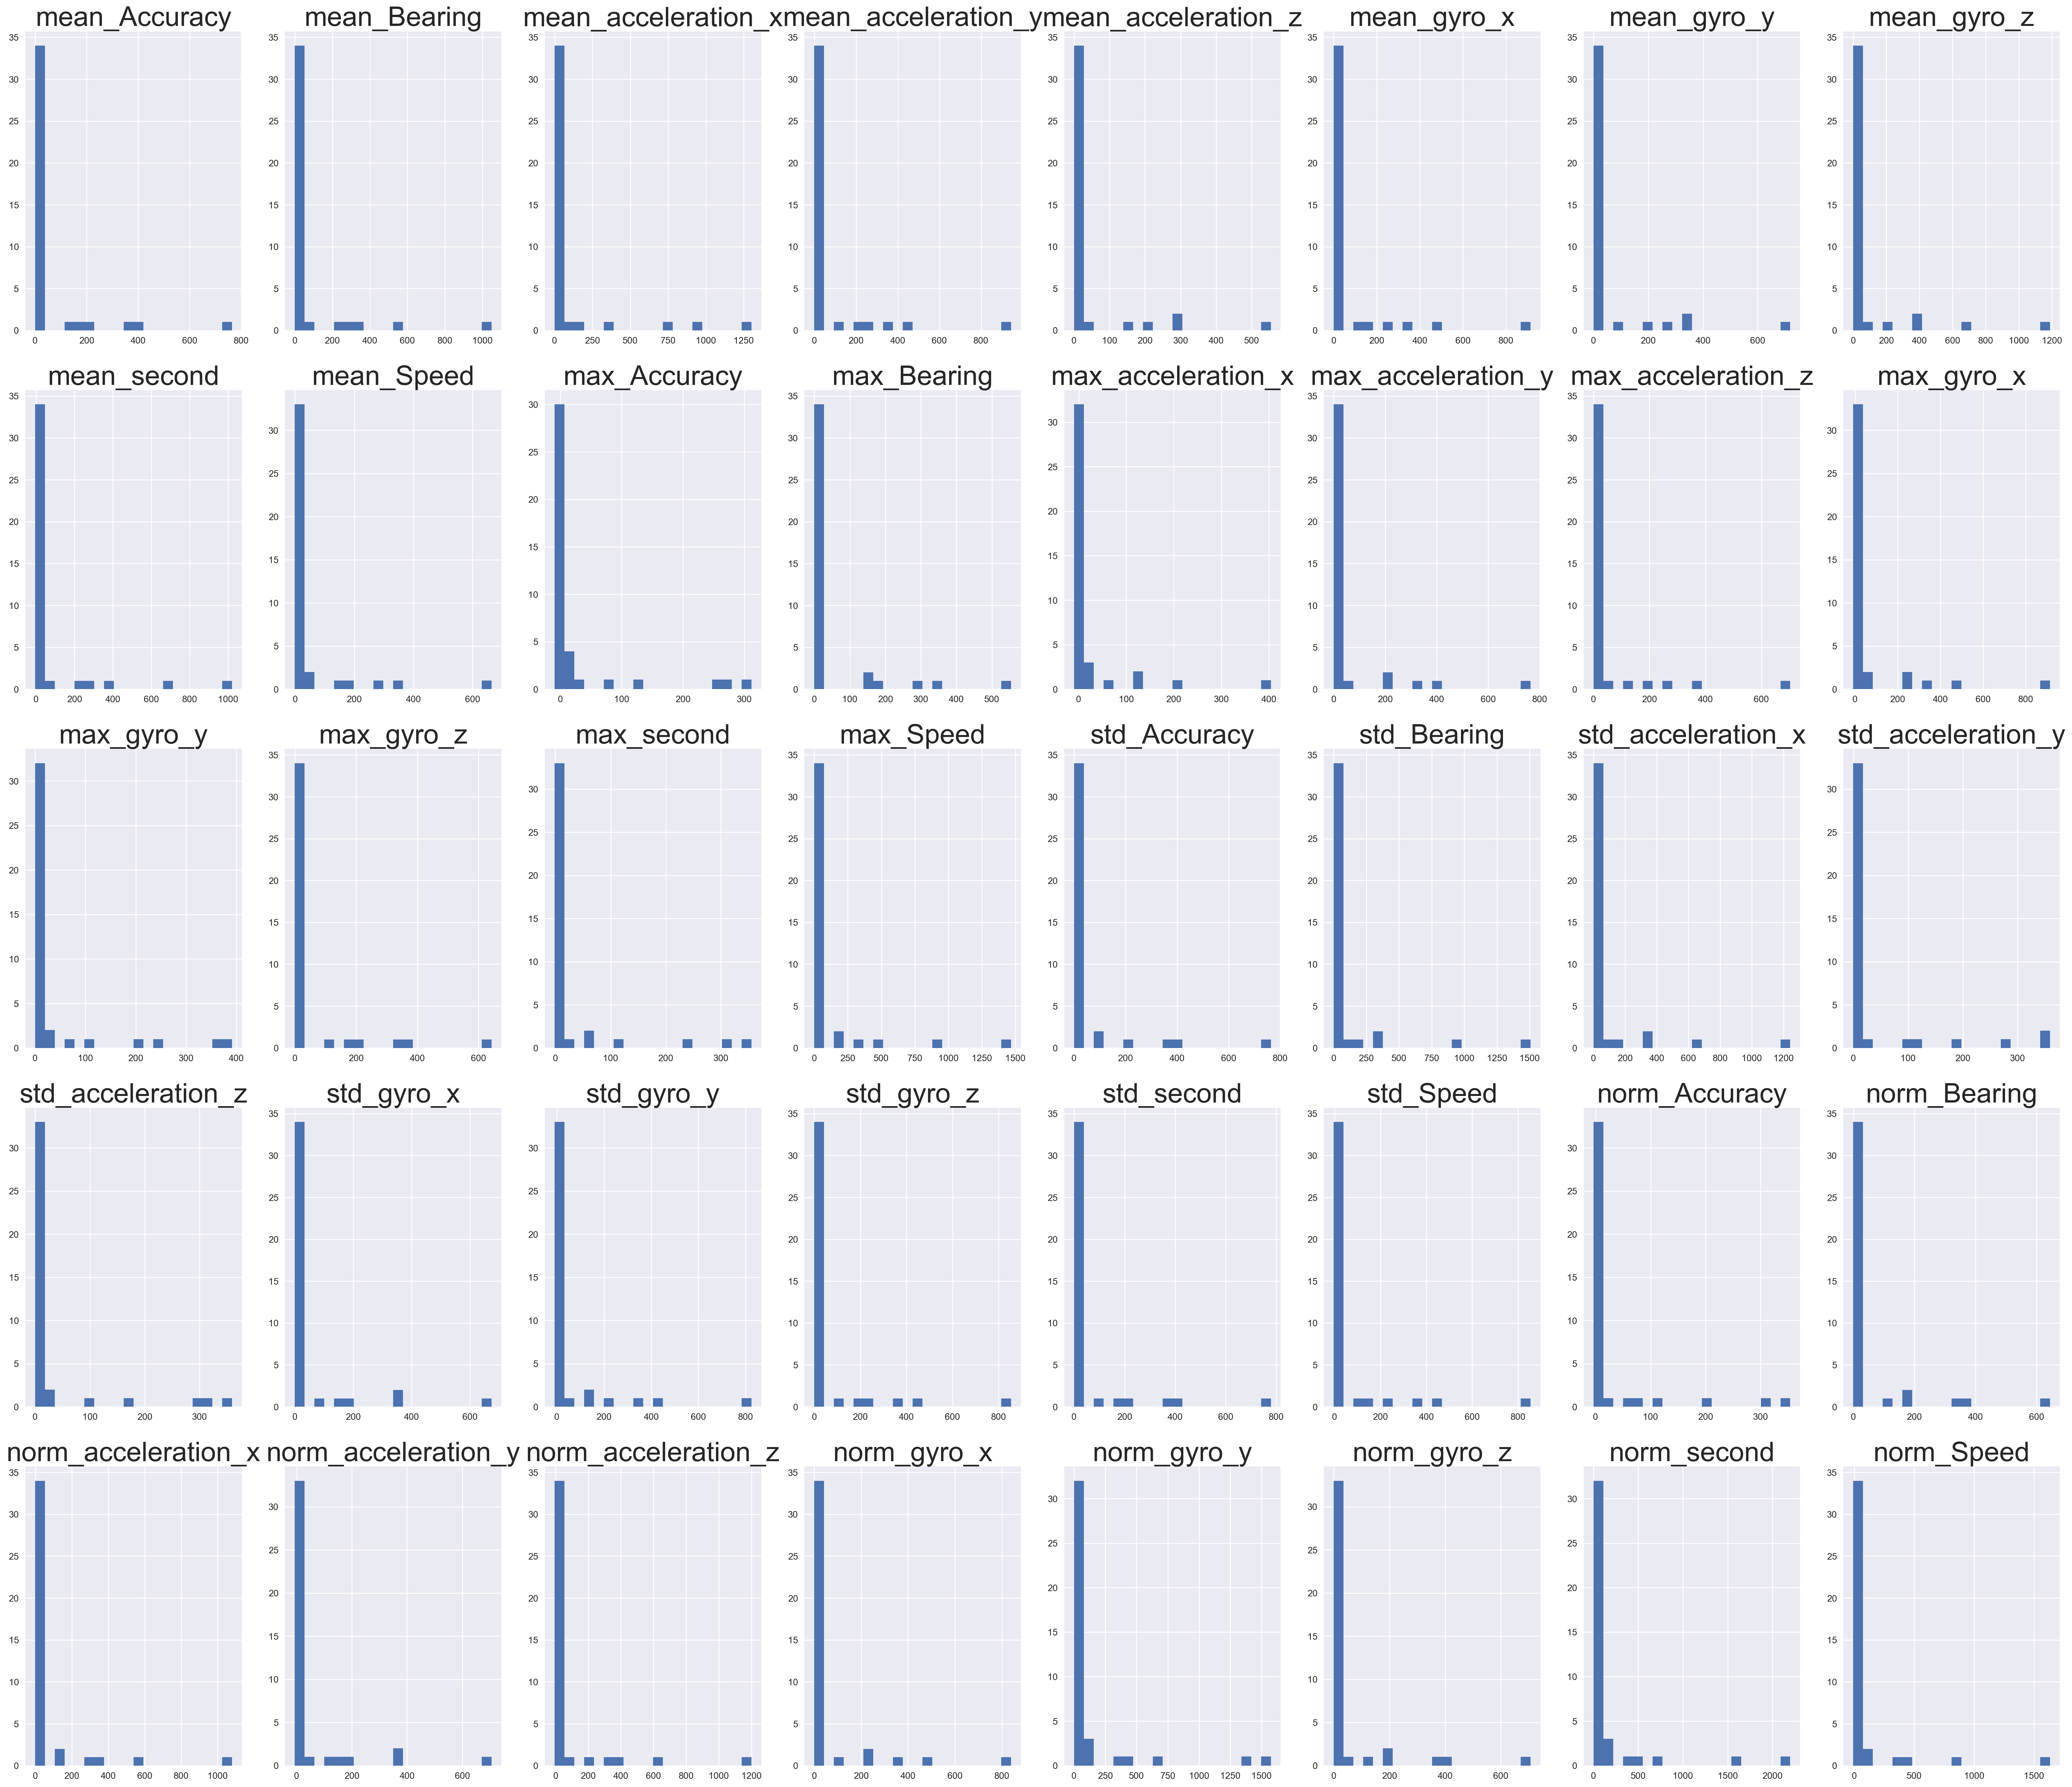

In [15]:
plt.figure(figsize=(40,35), dpi=200)

for i in range(len(final_df.columns)):
    plt.subplot(5,8,i+1)
    plt.hist(final_df.iloc[i], bins=20)
    plt.title(final_df.columns[i], size=30)

<h3>Histograms of Standardized Features</h3>

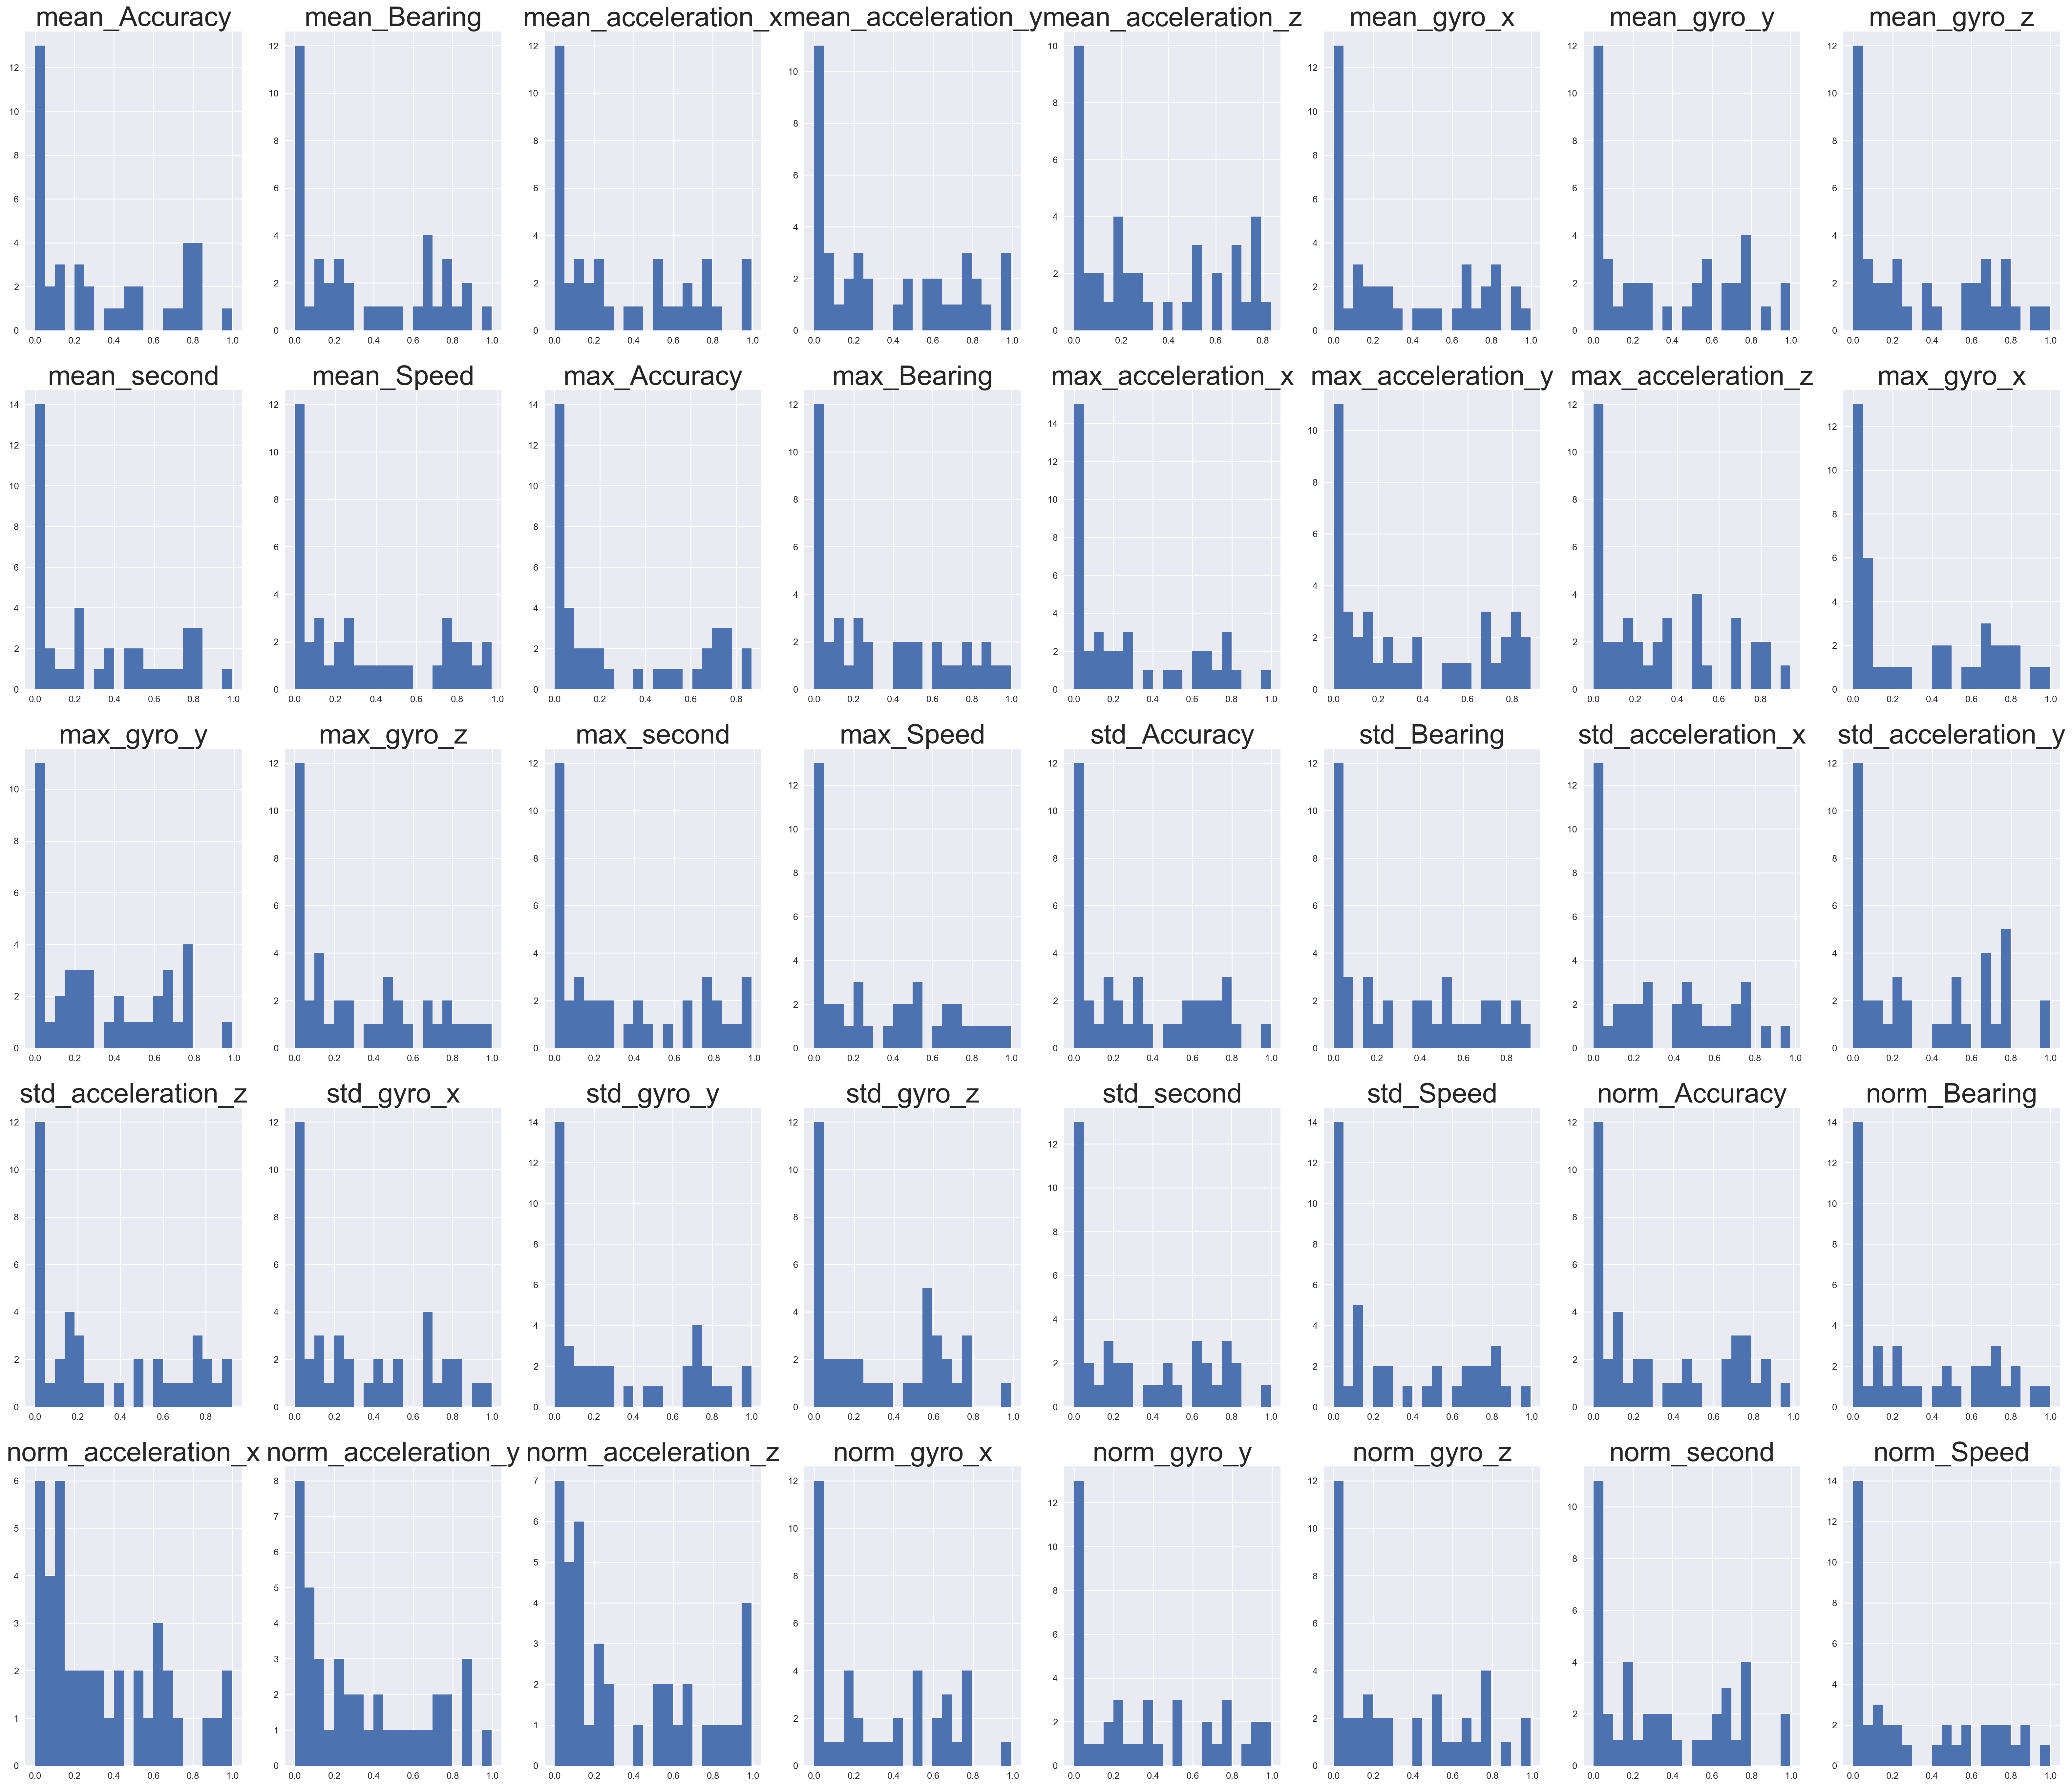

In [16]:
from sklearn.preprocessing import MinMaxScaler

#standardize the features
scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(final_df))
scaled_df.columns = final_df.columns

plt.figure(figsize=(40,35), dpi=200)
for i in range(len(scaled_df.columns)):
    plt.subplot(5,8,i+1)
    plt.hist(scaled_df.iloc[i], bins=20)
    plt.title(scaled_df.columns[i], size=30)

<h3>Balancing the Dataset</h3>

The dataset consists of roughly 75% (4993) "not dangerous" labels and 25% (15007) "dangerous" labels.

My attempts at training models on the unbalanced dataset led to a baseline accuracy of ~70% with a very poor recall rate (~10%) for "dangerous" labels, i.e. the model's accuracy is artificially inflated since predicting "not dangerous" most of the time regardless of the learned features aligns with the dataset's "dangerous" to "not dangerous" ratio of 3:1.

Setting the classification models with a class_weight parameter of "balanced" did not improve the recall rate much - only to around ~30%.

Assuming that we would rather err on the side of caution, we would like to be able to detect more "dangerous" trips even at the cost of accuracy, as opposed to missing trips that contain "dangerous" characteristics. In other words, it is better to have a high true positive rate even if that means having a high false positive rate as well. In terms of precision and recall, we would like the "dangerous" label to have a higher recall rate than the "not dangerous" label since it would be less cautious to mislabel a "dangerous" ride as "not dangerous" vs the other way around.

To balance the dataset and improve the recall rate, the number of 0 labels are trimmed so that there are equal number of 0 labels as 1 labels, i.e. 4993 labels each, giving a total dataset size of 9986 data points.

In [17]:
class_1 = scaled_df[labels['label']==1] #get labels with value 1
class_0 = scaled_df[labels['label']==0] #get labels wih value 0
print(f"Shape of class 1 dataframe: {class_1.shape}")
print(f"Shape of class 0 dataframe: {class_0.shape}")

#create balanced df by using all labels from class 1 and randomly sampling from class_0 df
balanced_df = pd.concat([class_1,class_0.sample(len(class_1))])
#create balanced label df using index of balanced_df
balanced_labels = labels.iloc[balanced_df.index]

print(f"Shape of balanced data and balanced labels: {balanced_df.shape}, {balanced_labels.shape}")

Shape of class 1 dataframe: (4993, 40)
Shape of class 0 dataframe: (15007, 40)
Shape of balanced data and balanced labels: (9986, 40), (9986, 3)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(balanced_df, balanced_labels['label'], test_size = 0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7988, 40) (1998, 40) (7988,) (1998,)


<h2>Building the Model</h2>

Three different models were trained and tested on the dataset. Feature selection was applied using Sklearn's Recursive Feature Elimination with Cross-Validated Selection (RFECV) function. The goal of RFECV is to select features by recursively considering smaller and smaller sets of features, then choosing the optimal number of features that produces the best cross-validation score.

<h4>Logistic Regression Model</h4>

Sklearn's LogisticRegressionCV function was used to finetune the logistic regression hyperparameters via cross-validation.

<h4>Linear Discriminant Analysis (LDA) Model</h4>

LDA is used as an alternative classification method. Dimensionality reduction was not conducted since the RFECV function was used to choose the optimal number of features.

<h4>Neural Network Model</h4>

A simple sequential network consisting of 4 layers (1 input, 2 hidden, 1 output) and 1985 trainable parameters was trained on the data. The model was set to train for 300 epochs, and early stopping was used to obtain the model weights at the epoch with the lowest validation loss. 

In [19]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def selector_model(estimator, X_train, y_train):
    ''' 
    Inputs:
        X_train (arr): Feature array of data.
        y_train (arr): Response array of data.
    Outputs:
        selector: estimator with feature selection applied
        Attributes:
            ranking_: The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature.              
    '''
    selector = RFECV(estimator, step = 1, scoring='accuracy').fit(X_train, y_train)
    return selector
    
def align_coefficients(selector): 
    '''
    Simple function to adjust coefficient layout in dataframe to correspond with selected features from the given selector.
    '''
    coefs = []
    j=0
    for i in range(len(selector.ranking_)):
        if selector.ranking_[i] != 1:
            coefs.append(np.nan)
        else:
            coefs.append(selector.estimator_.coef_[0][j])
            j += 1
    return coefs

#models with feature selection
logr = selector_model(LogisticRegressionCV(), X_train, y_train)
lda = selector_model(LinearDiscriminantAnalysis(), X_train, y_train) 


<h3>Feature Ranking and Coefficients</h3>

The dataframe below shows that for the logistic regression model, the features with the highest positive coefficients are max_speed, and max_acceleration in the x, y, and z-axis; the features with the highest negative coefficients are mean_speed and mean_acceleration.

For the LDA model, the features with the highest positive coefficient appear to be max_second, std_second, and mean_second, implying that the total duration of a GRAB trip has a high correlation with the "dangerous"/"not dangerous" rating it receives from a customer.

The cross-validation plot shows that the optimal number of features as determined by RFECV for the logistic regression model is 38, while the optimal number for the LDA model is 19.

In [20]:
#selected features df
feature_df = pd.DataFrame({
    "Features":scaled_df.columns,
    "Logistic Regression Feature Ranking": logr.ranking_,
    "Logistic Regression Coefficients": align_coefficients(logr),
    "LDA Feature Ranking": lda.ranking_,
    "LDA Coefficients": align_coefficients(lda)})

feature_df.round(2).sort_values(by=['Logistic Regression Coefficients','LDA Coefficients'], ascending=False)


,Features,Logistic Regression Feature Ranking,Logistic Regression Coefficients,LDA Feature Ranking,LDA Coefficients
19,max_Speed,1,14.23,1,5.24
12,max_acceleration_x,1,5.92,1,0.35
27,std_gyro_z,1,4.03,1,2.69
14,max_acceleration_z,1,3.59,1,-0.64
13,max_acceleration_y,1,3.44,1,-0.73
11,max_Bearing,1,2.61,1,0.89
38,norm_second,1,2.28,1,1.48
15,max_gyro_x,1,1.90,1,-0.62
10,max_Accuracy,1,1.83,9,NaN
0,mean_Accuracy,1,1.55,1,1.42


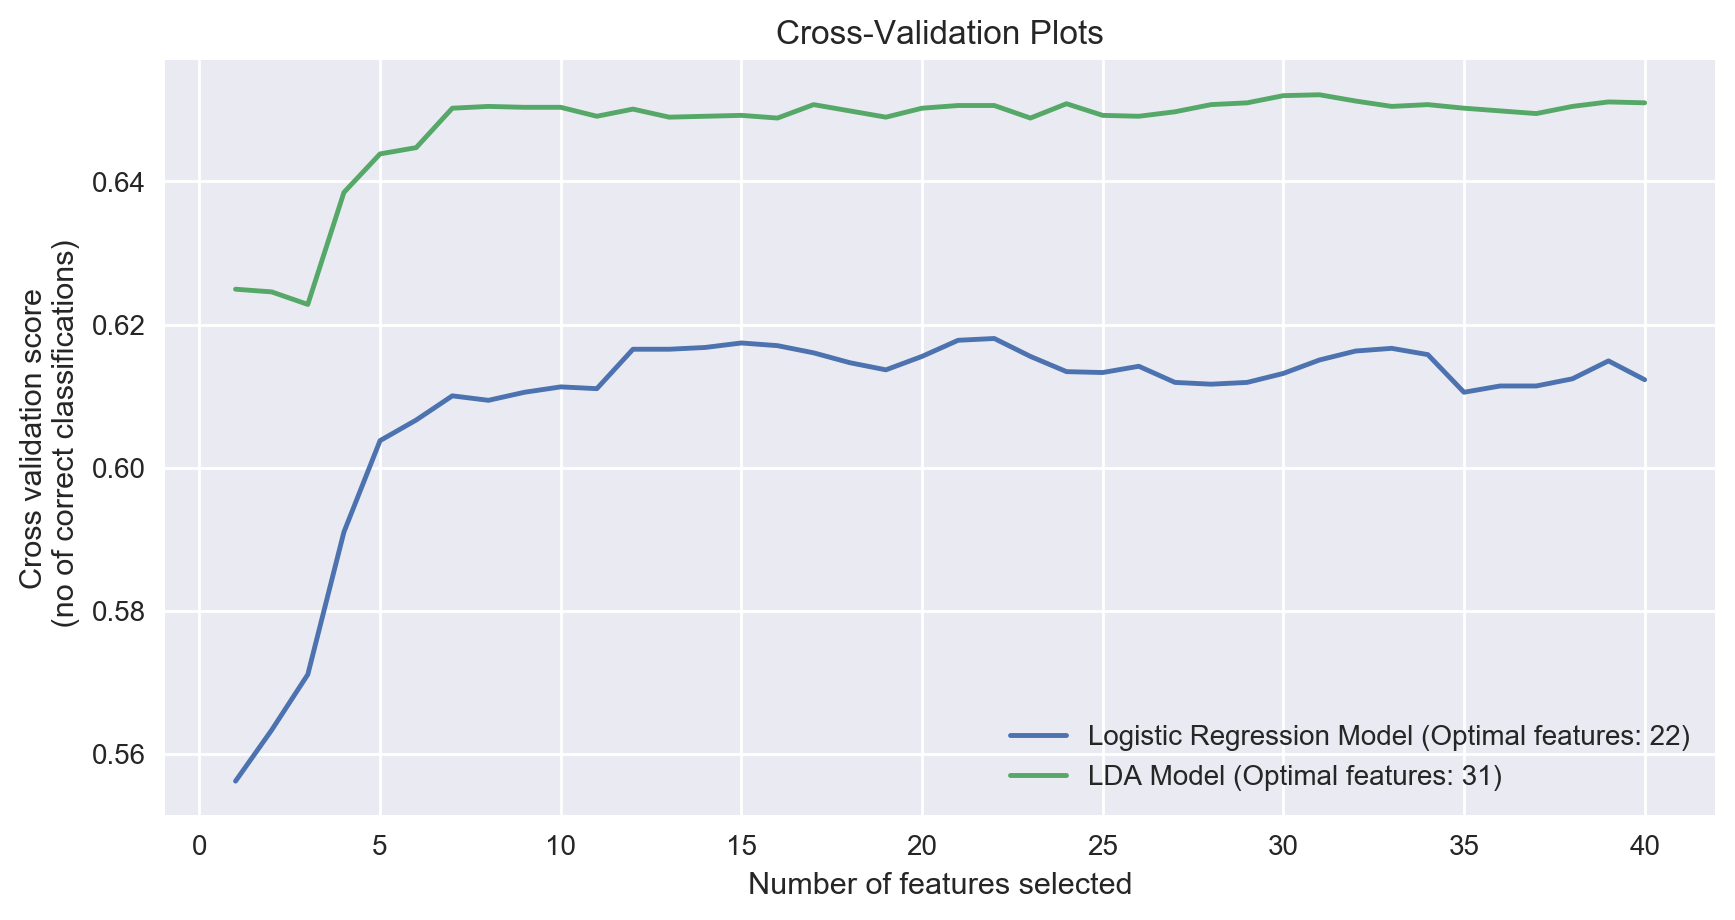

In [21]:
plt.figure(figsize=(10,5), dpi=200)

plt.plot(range(1, len(logr.grid_scores_) + 1), logr.grid_scores_,
            label=f"Logistic Regression Model (Optimal features: {logr.n_features_})")
plt.plot(range(1, len(lda.grid_scores_) + 1), lda.grid_scores_,
            label=f"LDA Model (Optimal features: {lda.n_features_})")   

plt.title(f"Cross-Validation Plots")
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score\n (no of correct classifications)")
plt.legend(loc='best')
plt.show()


<h3>Neural Network Model</h3>

The neural network model was set to run for 300 epochs, and early stopping was implemented to obtain the model weights at the epoch with the lowest validation loss.

The training epoch vs model loss plot shows that the lowest validation loss occurs around the 150th epoch, at which point the model starts overfitting as the training loss continues to decreases, but the validation loss starts increasing.

In [22]:
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

def create_mlp(dim):
    # define MLP network
    model = Sequential()
    model.add(Dense(32, input_dim=dim, activation="relu"))
    model.add(Dense(16, activation="relu")) 
    model.add(Dropout(0.5))
    model.add(Dense(8, activation="relu")) 
    model.add(Dropout(0.5))
    model.add(Dense(4, activation="relu")) 
    model.add(Dense(1, activation="sigmoid"))
    return model

nn_model = create_mlp(X_train.shape[1])
nn_model.summary()


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1312      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)      

In [23]:
nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=300, batch_size=20,
             callbacks = [EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)],
             validation_split = 0.2, verbose=2)


Instructions for updating:
Use tf.cast instead.
Train on 6390 samples, validate on 1598 samples
Epoch 1/300
 - 1s - loss: 0.6950 - acc: 0.5031 - val_loss: 0.6928 - val_acc: 0.5225
Epoch 2/300
 - 1s - loss: 0.6921 - acc: 0.5144 - val_loss: 0.6928 - val_acc: 0.5175
Epoch 3/300
 - 1s - loss: 0.6923 - acc: 0.5166 - val_loss: 0.6916 - val_acc: 0.5488
Epoch 4/300
 - 1s - loss: 0.6912 - acc: 0.5261 - val_loss: 0.6903 - val_acc: 0.5651
Epoch 5/300
 - 0s - loss: 0.6901 - acc: 0.5305 - val_loss: 0.6888 - val_acc: 0.5688
Epoch 6/300
 - 1s - loss: 0.6862 - acc: 0.5379 - val_loss: 0.6870 - val_acc: 0.5219
Epoch 7/300
 - 1s - loss: 0.6872 - acc: 0.5397 - val_loss: 0.6882 - val_acc: 0.5419
Epoch 8/300
 - 0s - loss: 0.6835 - acc: 0.5432 - val_loss: 0.6788 - val_acc: 0.5713
Epoch 9/300
 - 1s - loss: 0.6834 - acc: 0.5437 - val_loss: 0.6811 - val_acc: 0.5745
Epoch 10/300
 - 1s - loss: 0.6800 - acc: 0.5437 - val_loss: 0.6781 - val_acc: 0.5788
Epoch 11/300
 - 0s - loss: 0.6812 - acc: 0.5412 - val_loss: 0.6

Epoch 94/300
 - 0s - loss: 0.6459 - acc: 0.6156 - val_loss: 0.6415 - val_acc: 0.6089
Epoch 95/300
 - 0s - loss: 0.6484 - acc: 0.6081 - val_loss: 0.6550 - val_acc: 0.5757
Epoch 96/300
 - 0s - loss: 0.6489 - acc: 0.6038 - val_loss: 0.6447 - val_acc: 0.6045
Epoch 97/300
 - 1s - loss: 0.6467 - acc: 0.6161 - val_loss: 0.6486 - val_acc: 0.6033
Epoch 98/300
 - 0s - loss: 0.6461 - acc: 0.6045 - val_loss: 0.6441 - val_acc: 0.6114
Epoch 99/300
 - 1s - loss: 0.6462 - acc: 0.6106 - val_loss: 0.6450 - val_acc: 0.6139
Epoch 100/300
 - 0s - loss: 0.6431 - acc: 0.6158 - val_loss: 0.6423 - val_acc: 0.6076
Epoch 101/300
 - 1s - loss: 0.6461 - acc: 0.6106 - val_loss: 0.6429 - val_acc: 0.6108
Epoch 102/300
 - 1s - loss: 0.6455 - acc: 0.6147 - val_loss: 0.6433 - val_acc: 0.6064
Epoch 103/300
 - 1s - loss: 0.6457 - acc: 0.6061 - val_loss: 0.6426 - val_acc: 0.6095
Epoch 104/300
 - 1s - loss: 0.6438 - acc: 0.6191 - val_loss: 0.6426 - val_acc: 0.6058
Epoch 105/300
 - 1s - loss: 0.6446 - acc: 0.6125 - val_loss:

Epoch 190/300
 - 1s - loss: 0.6337 - acc: 0.6191 - val_loss: 0.6427 - val_acc: 0.6158
Epoch 191/300
 - 1s - loss: 0.6397 - acc: 0.6180 - val_loss: 0.6422 - val_acc: 0.6183
Epoch 192/300
 - 1s - loss: 0.6346 - acc: 0.6239 - val_loss: 0.6426 - val_acc: 0.6145
Epoch 193/300
 - 1s - loss: 0.6344 - acc: 0.6224 - val_loss: 0.6395 - val_acc: 0.6089
Epoch 194/300
 - 1s - loss: 0.6345 - acc: 0.6233 - val_loss: 0.6441 - val_acc: 0.6126
Epoch 195/300
 - 1s - loss: 0.6340 - acc: 0.6310 - val_loss: 0.6444 - val_acc: 0.6083
Epoch 196/300
 - 1s - loss: 0.6338 - acc: 0.6268 - val_loss: 0.6397 - val_acc: 0.6164
Epoch 197/300
 - 0s - loss: 0.6315 - acc: 0.6258 - val_loss: 0.6408 - val_acc: 0.6058
Epoch 198/300
 - 1s - loss: 0.6339 - acc: 0.6239 - val_loss: 0.6424 - val_acc: 0.6120
Epoch 199/300
 - 1s - loss: 0.6350 - acc: 0.6263 - val_loss: 0.6372 - val_acc: 0.6145
Epoch 200/300
 - 1s - loss: 0.6319 - acc: 0.6319 - val_loss: 0.6392 - val_acc: 0.6089
Epoch 201/300
 - 1s - loss: 0.6343 - acc: 0.6286 - val

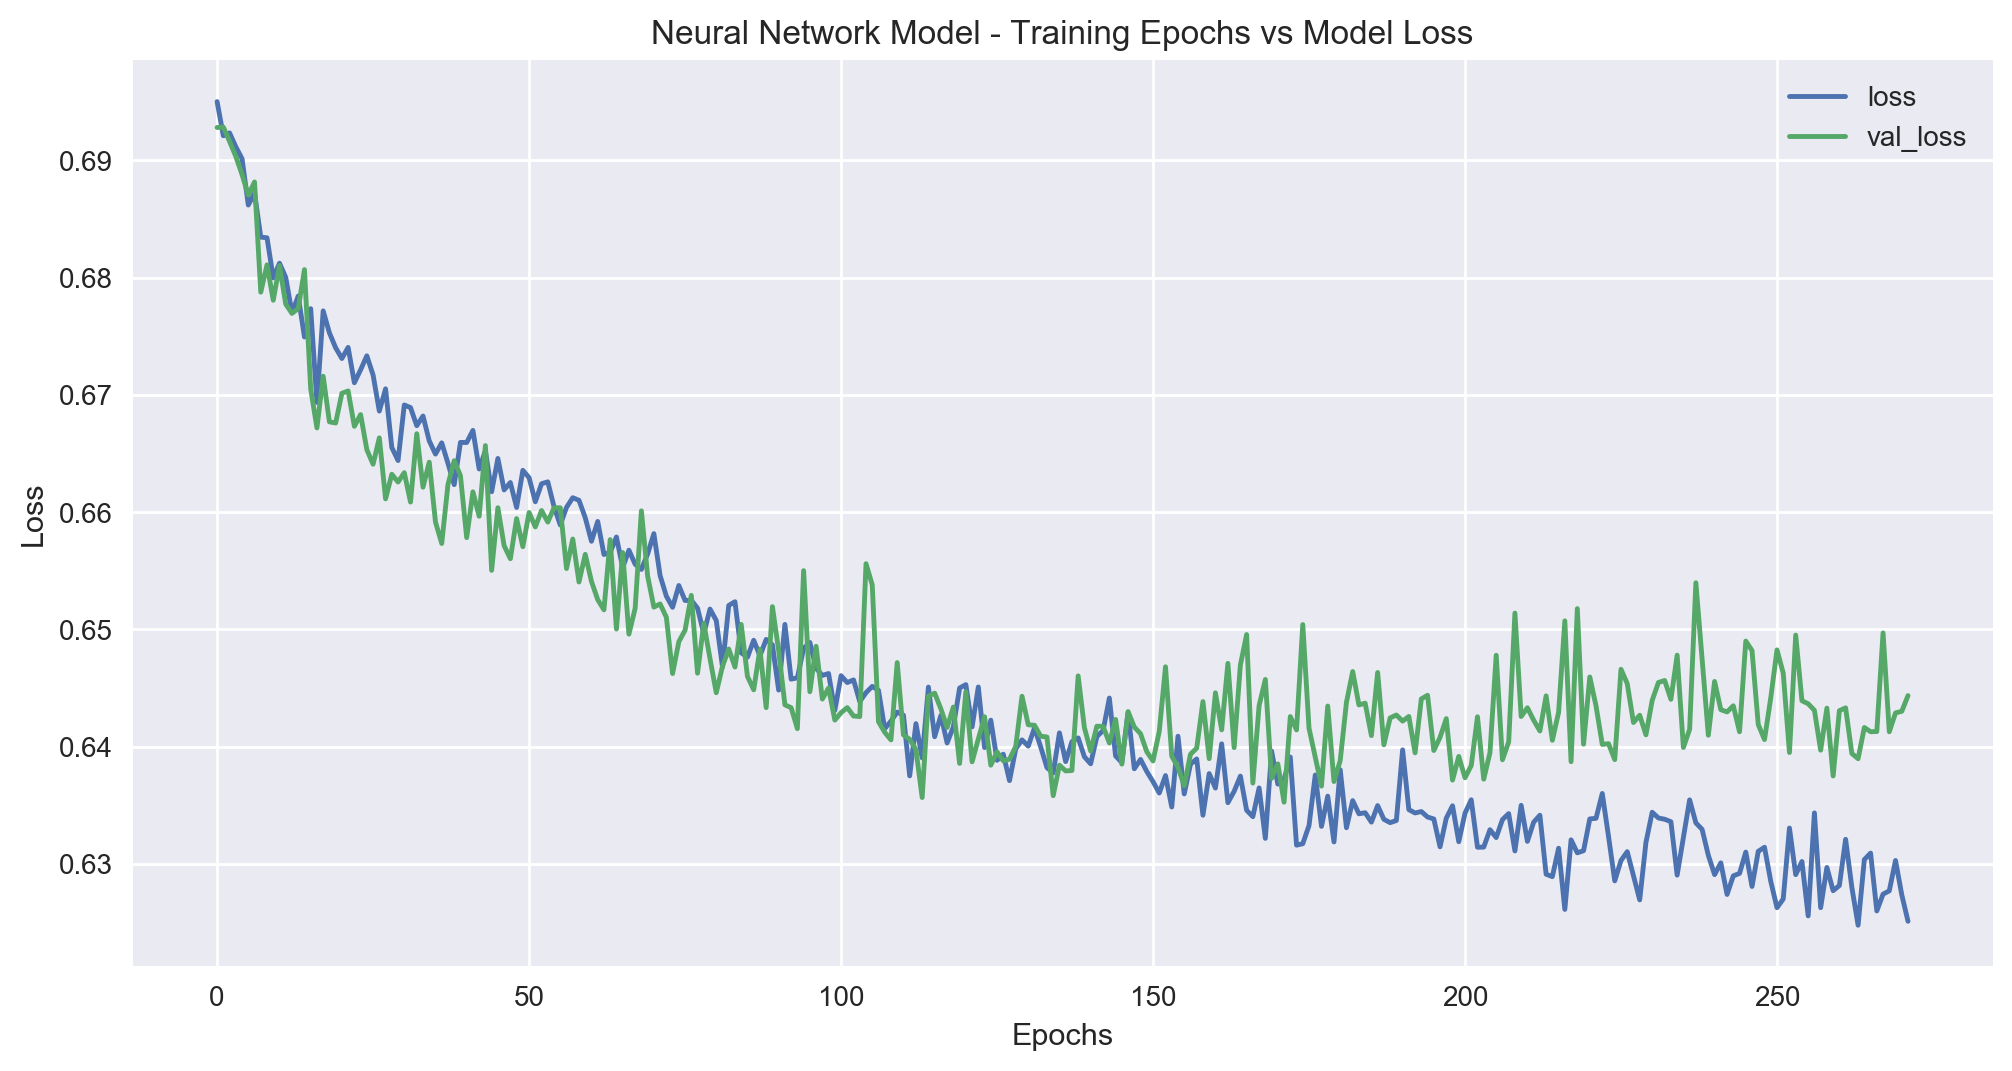

In [24]:
plt.figure(figsize=(12,6),dpi=200)
plt.plot(nn_model.history.history['loss'], label='loss')
plt.plot(nn_model.history.history['val_loss'], label='val_loss')
plt.title("Neural Network Model - Training Epochs vs Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

<h3>Precision-Recall and ROC Curve</h3>

From the precision-recall and ROC curves, we can determine the trade-off between the precision and recall, and the true positive rate and false positive rate that fits our use-case. As mentioned earlier, for this specific case, the recall rate for the "dangerous" label needs to be assigned significant priority since the cost of mislabeling a "dangerous" trip as "not dangerous" would presumably outweigh the cost of mislabeling a "not dangerous" trip as "dangerous.

The LDA model has a higher AUC for both the Precision-Recall and ROC curve; which suggests a better performance to suit our needs vs the Logistic Regression model and the Neural Network Model.

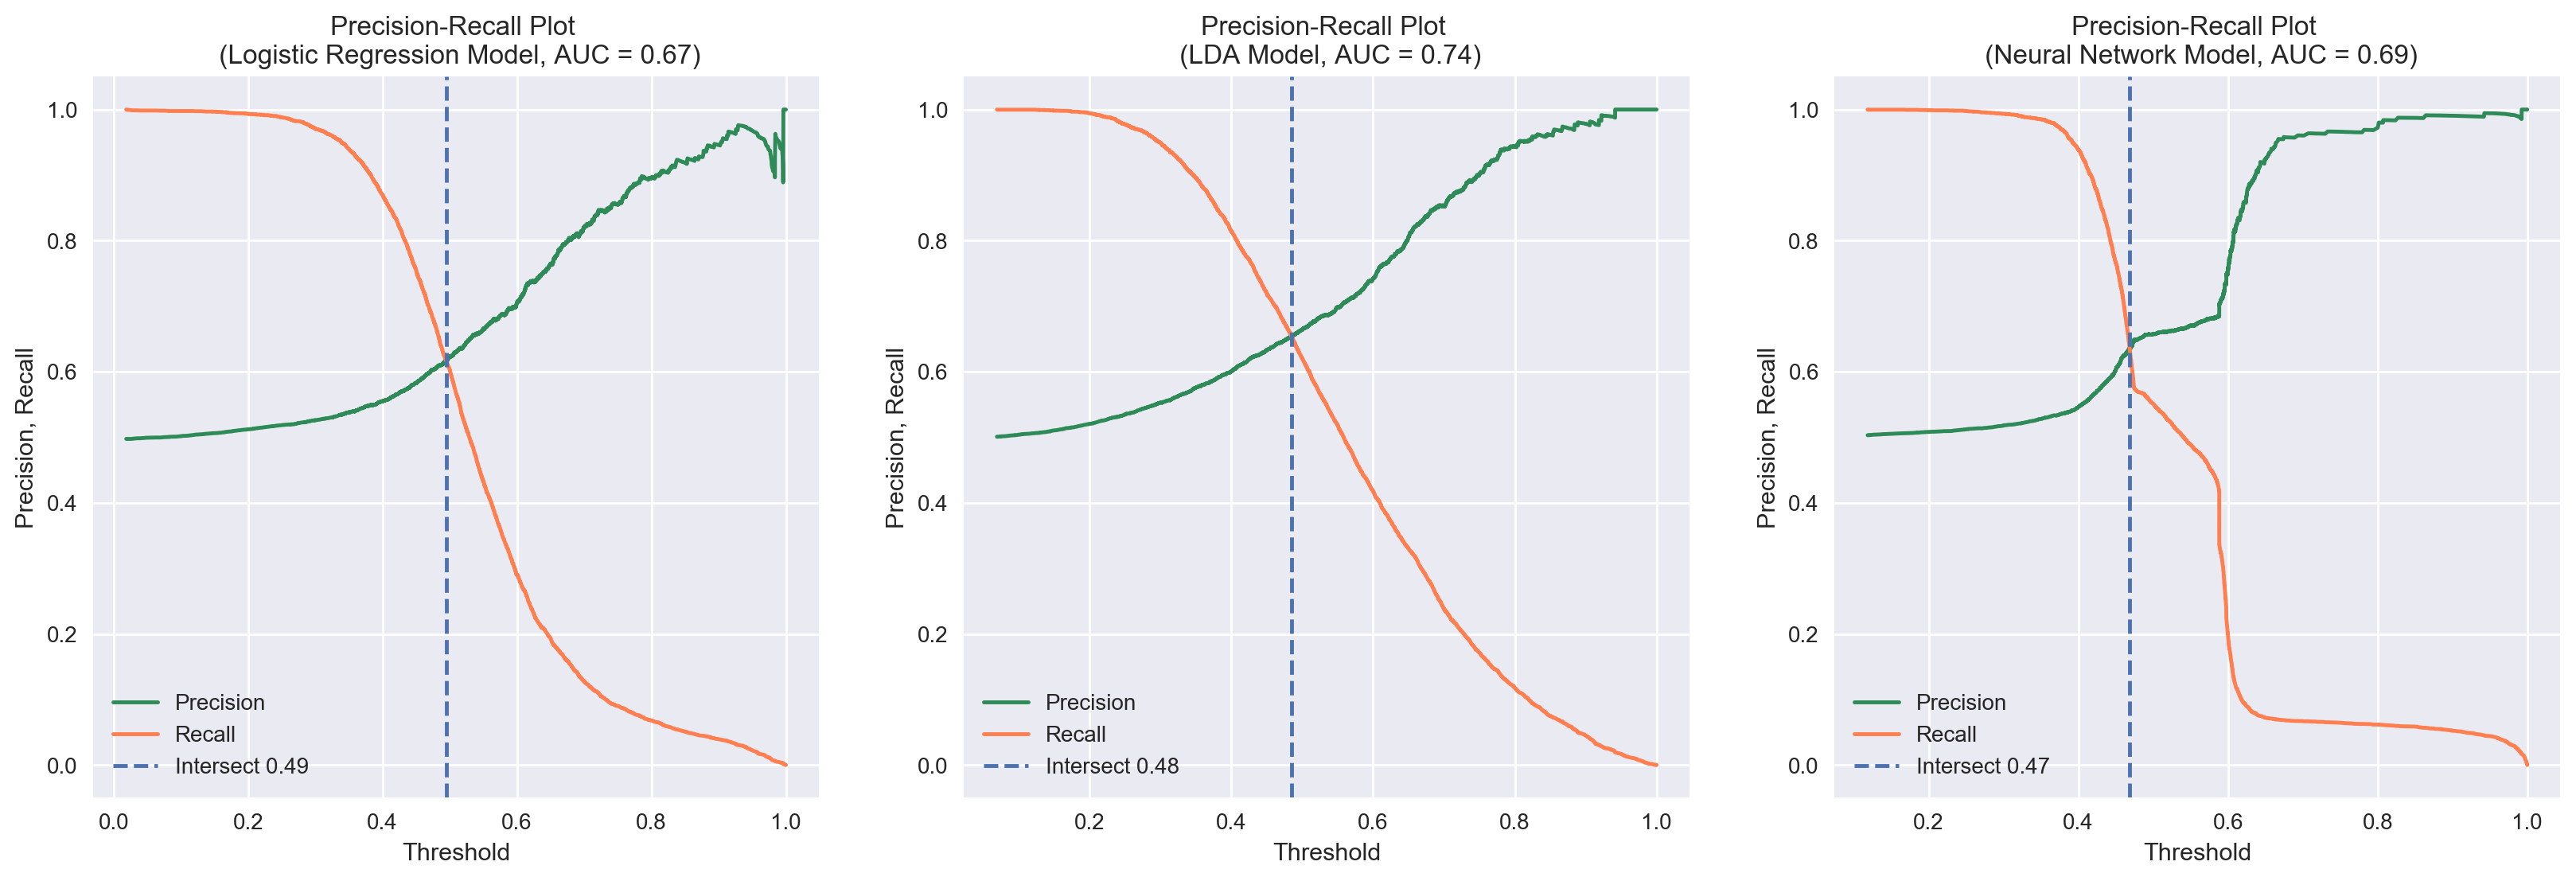

In [25]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

def plot_precision_recall(model, title):
    '''
    plot precision recall curve vs different model thresholds
    '''

    # y_prob is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)
    y_prob = model.predict_proba(X_train)

    precision, recall, thresholds = precision_recall_curve(y_train, y_prob[:, -1]) 

    #retrieve probability of being 1
    pr_auc = auc(recall, precision)

    #get intersection between precision and recall curves
    intersect = thresholds[precision[: -1]==recall[: -1]][0]

    plt.title(f"Precision-Recall Plot \n ({title} Model, AUC = {round(pr_auc,2)})")
    plt.plot(thresholds, precision[: -1], color="seagreen", label="Precision")
    plt.plot(thresholds, recall[: -1], color="coral", label="Recall")
    plt.axvline(intersect, linestyle='--', label="Intersect %.2f" % intersect)
    plt.ylabel("Precision, Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    
plt.figure(figsize=(20,6), dpi=200)
plt.subplot(1,3,1)
plot_precision_recall(logr, "Logistic Regression")
plt.subplot(1,3,2)
plot_precision_recall(lda, "LDA")
plt.subplot(1,3,3)
plot_precision_recall(nn_model, "Neural Network")

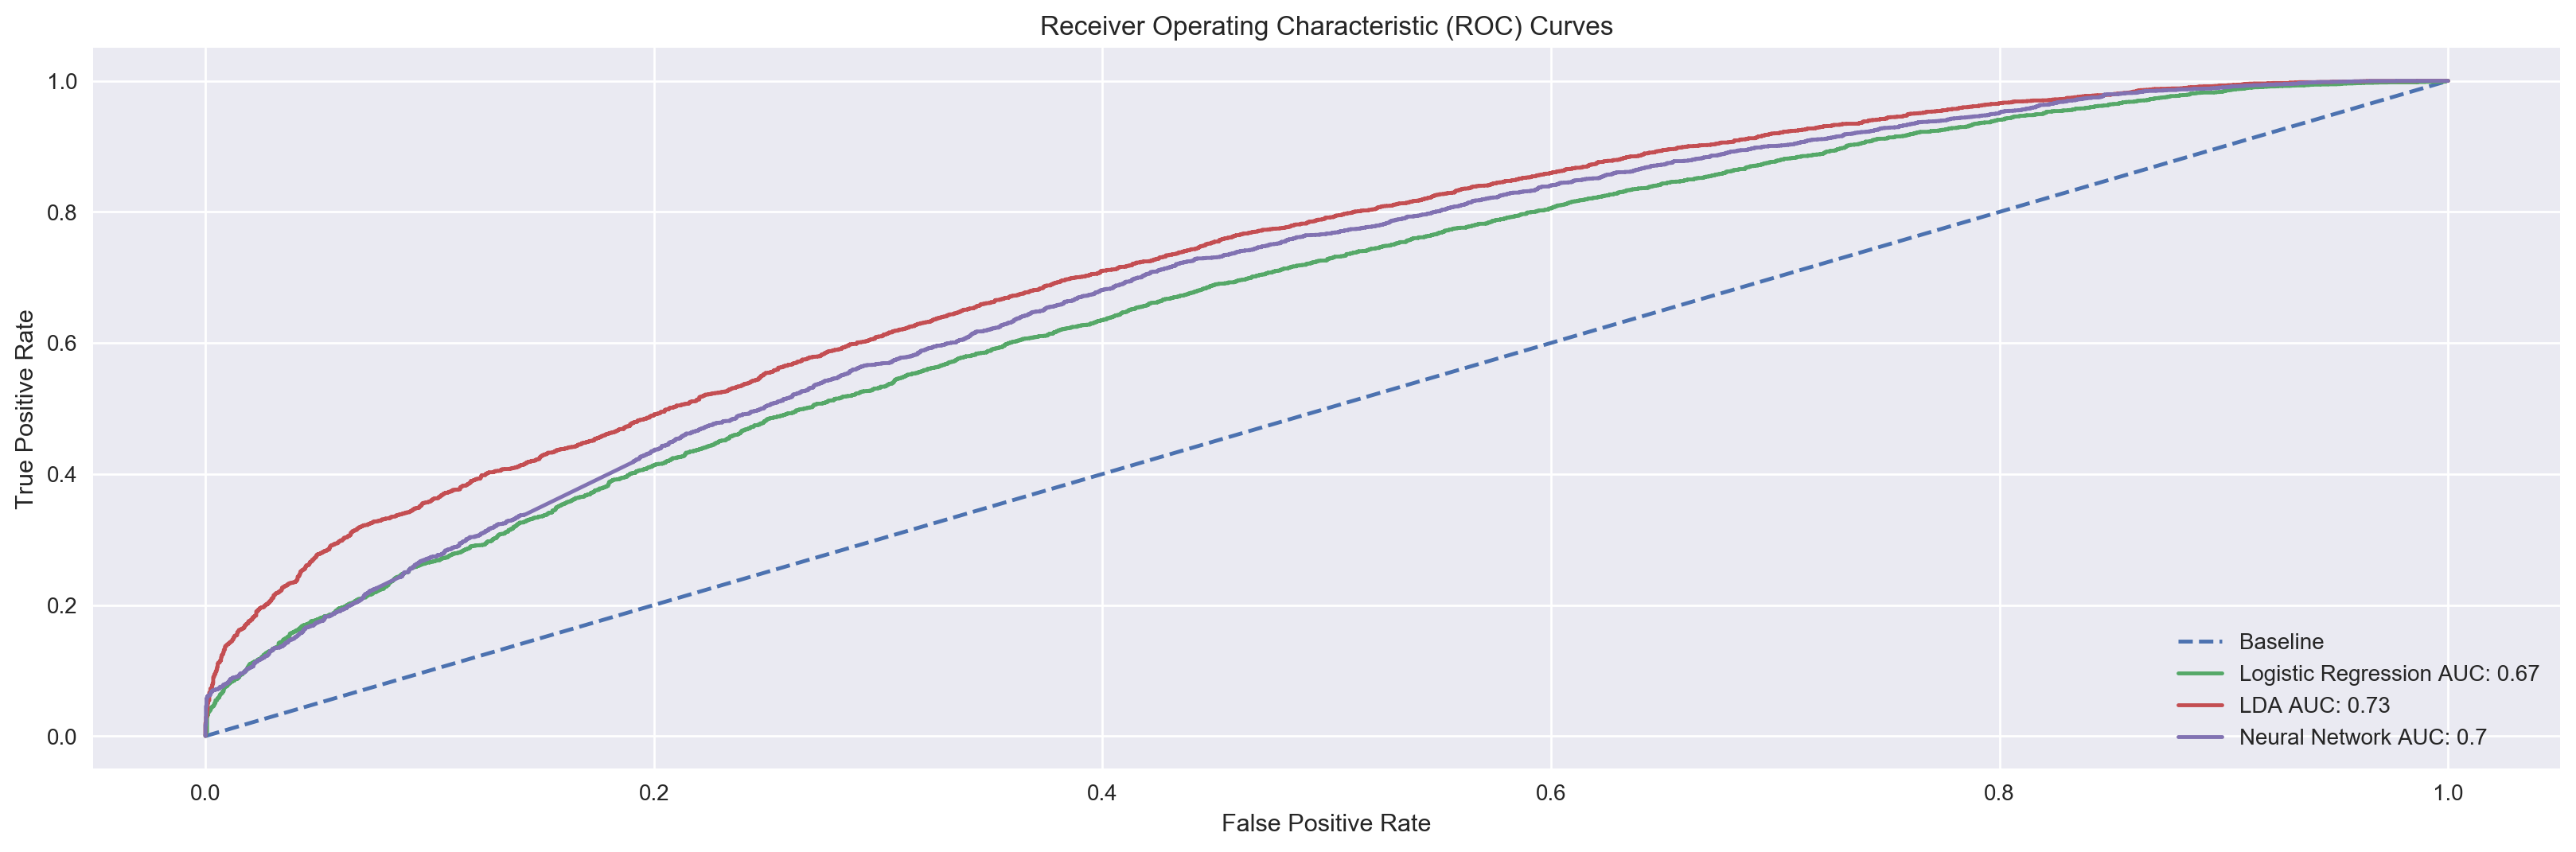

In [26]:
plt.figure(figsize=(20,6), dpi=200)

def plot_roc(model, title):
    fpr, tpr, threshold = roc_curve(y_train, model.predict_proba(X_train)[:,-1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = f"{title} AUC: {round(roc_auc,2)}")

plt.plot([0, 1], [0, 1],linestyle='--',label='Baseline')
plot_roc(logr, 'Logistic Regression')
plot_roc(lda, 'LDA')
plot_roc(nn_model, 'Neural Network')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

<h3>Classification Report and Confusion Matrix</h3>

The classification reports shows that the LDA model has the highest precision and recall for both classes (0s and 1s) across both the training and testing datasets. While the difference in scores between all 3 models is not too large (~1% - 5%), the LDA model is preferred since it not only has the highest precision and recall scores, but is also less complex than the other models (the LDA model uses less features, as shown in the feature selection section above).

The confusion matrix visualizes these findings; the LDA confusion matrix has the lowest number of misclassifications and highest number of correct classifications for both classes.

In [27]:
from sklearn.metrics import classification_report

def train_test_reports(model, title):
    '''
    Get classification report for training and testing datasets.
    '''
    print(title)
    print()
    
    print("Training Report:")
    pred = model.predict(X_train)
    print(classification_report(y_train, pred))
    
    print("Testing Report:")
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

train_test_reports(logr, "Logistic Regression")
train_test_reports(lda, "Linear Discriminant Analysis")

Logistic Regression

Training Report:
             precision    recall  f1-score   support

          0       0.62      0.64      0.63      4014
          1       0.62      0.60      0.61      3974

avg / total       0.62      0.62      0.62      7988

Testing Report:
             precision    recall  f1-score   support

          0       0.58      0.64      0.61       979
          1       0.62      0.57      0.59      1019

avg / total       0.60      0.60      0.60      1998

Linear Discriminant Analysis

Training Report:
             precision    recall  f1-score   support

          0       0.65      0.69      0.67      4014
          1       0.66      0.62      0.64      3974

avg / total       0.66      0.66      0.66      7988

Testing Report:
             precision    recall  f1-score   support

          0       0.64      0.72      0.68       979
          1       0.69      0.62      0.65      1019

avg / total       0.67      0.66      0.66      1998



In [28]:
train_pred = nn_model.predict_classes(X_train)
test_pred = nn_model.predict_classes(X_test)

print("Neural Network Model")
print()
print("Training report:")
print(classification_report(y_train, train_pred))
print("Testing report:")
print(classification_report(y_test, test_pred))

Neural Network Model

Training report:
             precision    recall  f1-score   support

          0       0.62      0.72      0.66      4014
          1       0.66      0.55      0.60      3974

avg / total       0.64      0.63      0.63      7988

Testing report:
             precision    recall  f1-score   support

          0       0.58      0.70      0.64       979
          1       0.64      0.52      0.58      1019

avg / total       0.62      0.61      0.61      1998



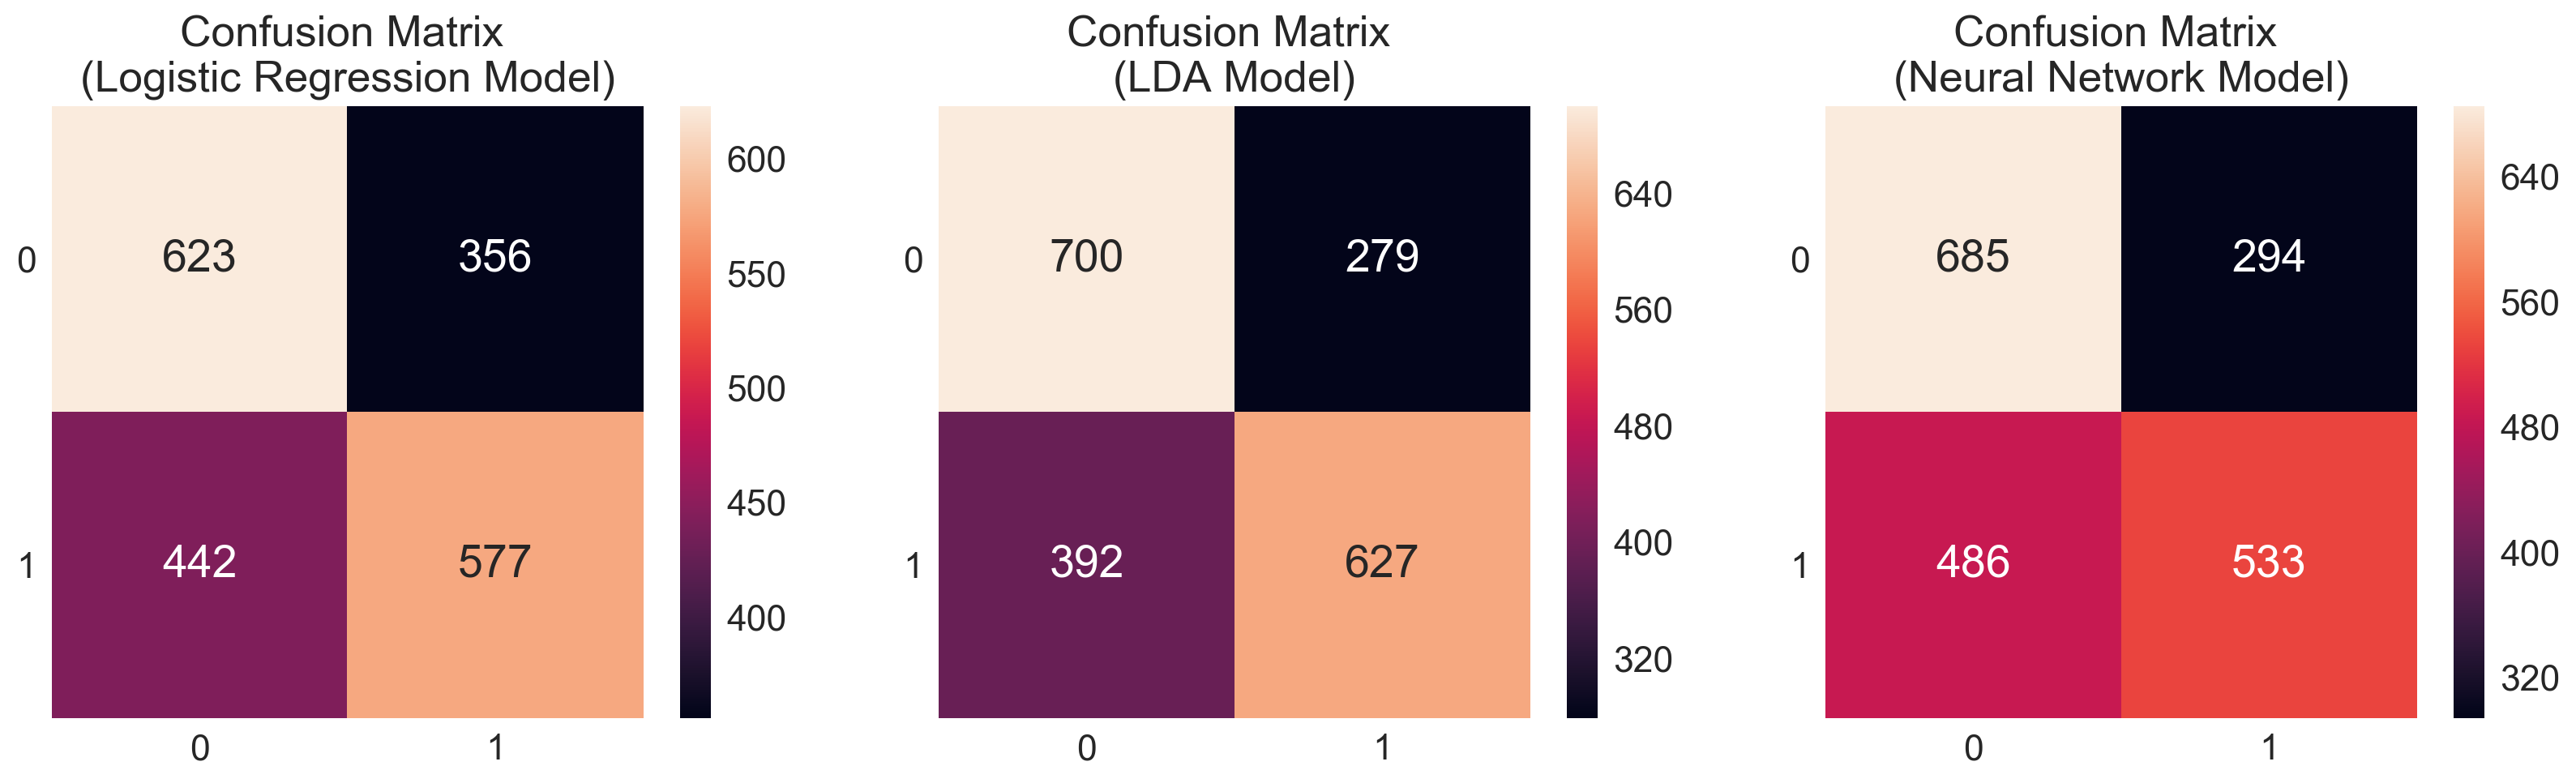

In [29]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, title):
    '''
    Plot a confusion matrix based on true y values vs predicted y values.
    '''
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm,index = [0,1], columns = [0,1])
    plt.title(f"Confusion Matrix \n({title} Model)")
    sns.heatmap(cm_df, annot=True, annot_kws={"size": 20}, fmt='.0f')
    plt.yticks(rotation=0) 

sns.set(font_scale=1.6) #set label size
plt.figure(figsize=(20,5), dpi=200)
plt.subplot(1,3,1)
plot_cm(y_test, logr.predict(X_test), "Logistic Regression")
plt.subplot(1,3,2)
plot_cm(y_test, lda.predict(X_test), "LDA")
plt.subplot(1,3,3)
plot_cm(y_test, nn_model.predict_classes(X_test), "Neural Network")

<h2>Conclusion</h2>

The LDA model has the best precision and recall rates when compared to the other models, while also being less complex than the other models, e.g. by using less features. As such, the LDA model is the chosen model for predicting whether a given GRAB trip is dangerous.

As the model's precision, recall, and overall accuracy hovers around 60% - 65%, more relevant and finely-engineered features may need to be collected to train the model to a higher accuracy.

In [30]:
# final model to be used for testing
final_model = lda
dir(lda)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_fit',
 '_get_param_names',
 '_get_support_mask',
 'cv',
 'decision_function',
 'estimator',
 'estimator_',
 'fit',
 'fit_transform',
 'get_params',
 'get_support',
 'grid_scores_',
 'inverse_transform',
 'n_features_',
 'n_jobs',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'ranking_',
 'score',
 'scoring',
 'set_params',
 'step',
 'support_',
 'transform',
 'verbose']